<a href="https://colab.research.google.com/github/goverdhana-srihitha/AI-ML/blob/master/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Name : G Sai Srihitha
#### pin : 221710402014

### Assessment on 17.07.2020


Dataset: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv

List of programming languages and technologies: 
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php',  'javascript', 'objectivec', 'ruby', 'perl','c','c#']

1.What programming languages and technologies are required at Amazon from the above list?(using BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns)

2.Programming Languages Popularity at Amazon: Extract the count of each programming language and visualize it through a bar plot
[ On X Axis→ Programming languages ]
[ On Y-axis→ Frequency of Programming Languages]

3.Visualize the job locations through a plot.(Consider only the locations which are repeating more than 10 times)


4.degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]
Popularity of Academic Degree at Amazon : Which degrees are most asked at Amazon from the above degree_list?
Make a plot to visualize Degree and its Popularity


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from collections import defaultdict 

### Load the Data

In [2]:
url = 'https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv'
df = pd.read_csv(url)

In [16]:
df.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [17]:
# List of programming languages and technologies: 
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php',  'javascript', 'objectivec', 'ruby', 'perl','c','c#']


### /1. 
What programming languages and technologies are required at Amazon from the above list?(using BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns)



In [18]:
qual = df['BASIC QUALIFICATIONS'].tolist()+df['PREFERRED QUALIFICATIONS'].tolist()
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qual).lower()

In [ ]:
qualifications_string

In [19]:
word = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;']", qualifications_string):
  if w in word:
    word[w]+=1
print(word)    

{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [20]:
#sorting the above dictionary
popularity = sorted(word.items(), key=lambda kv: kv[1] , reverse=True)

In [30]:
#New dataframe for programming languages and its popularity
popular_prog = pd.DataFrame(popularity,columns=['Language','Popularity'])
popular_prog

,Language,Popularity
0,java,3065
1,c++,1892
2,python,1187
3,c,1010
4,c#,991
5,javascript,832
6,ruby,570
7,perl,529
8,hadoop,219
9,spark,148


### 2.
Programming Languages Popularity at Amazon: Extract the count of each programming language and visualize it through a bar plot

[ On X Axis→ Programming languages ]

[ On Y-axis→ Frequency of Programming Languages]


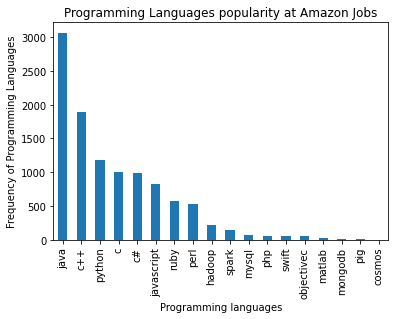

In [32]:
popular_prog.plot.bar(x='Language',y='Popularity',legend=False)
plt.title("Programming Languages popularity at Amazon Jobs")
plt.xlabel("Programming languages")
plt.ylabel("Frequency of Programming Languages")
plt.show()

### 3.
Visualize the job locations through a plot.(Consider only the locations which are repeating more than 10 times)


In [62]:
threshold = 10
job_description=pd.DataFrame(df)
location_value_counts = job_description.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
job_description['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = job_description.location.value_counts()
location_value_counts = location_value_counts[::-1]


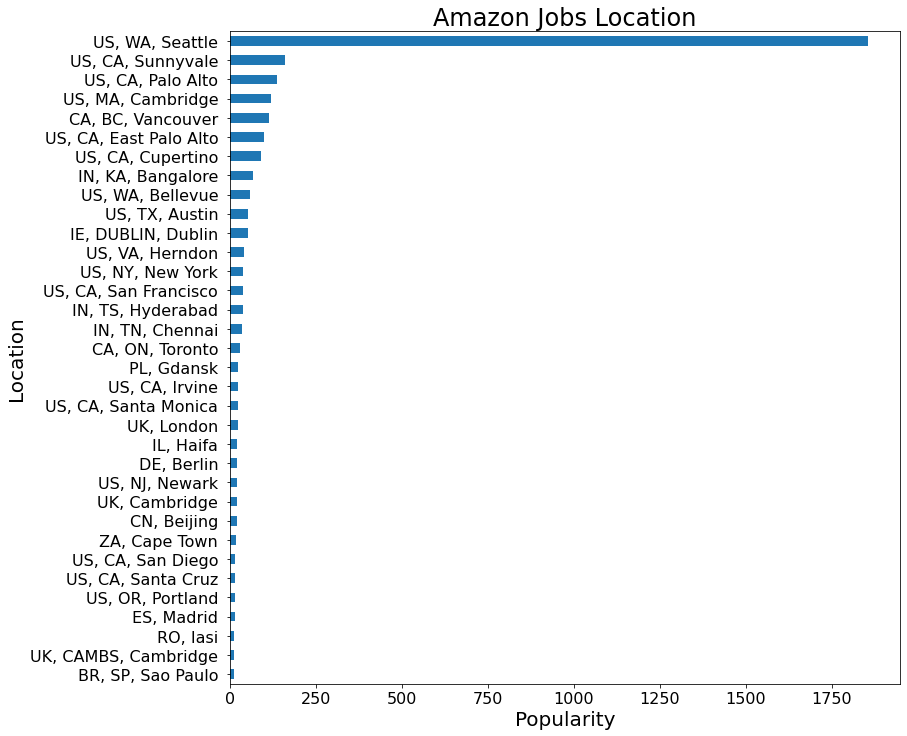

In [67]:
location_value_counts.plot.barh(figsize=(12, 12))
plt.title("Amazon Jobs Location", fontsize=24)
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

###4. 
 degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

Popularity of Academic Degree at Amazon : Which degrees are most asked at 
Amazon from the above degree_list?

Make a plot to visualize Degree and its Popularity


In [68]:
basic_qual_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qual)


In [40]:
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

In [42]:
words = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;']",basic_qual_string):
  if w in words:
    words[w]+=1
print(words)    

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


In [45]:
degree_needed = sorted(words.items(),key=lambda kv:kv[1], reverse = True)
degree_needed

[("Bachelor's", 947),
 ('BS', 524),
 ('PhD', 489),
 ('MS', 433),
 ("Master's", 417),
 ('BA', 2)]

In [46]:
#new dataframe 
df_degree_needed = pd.DataFrame(degree_needed,columns=['Degree','Popularity'])
df_degree_needed

,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


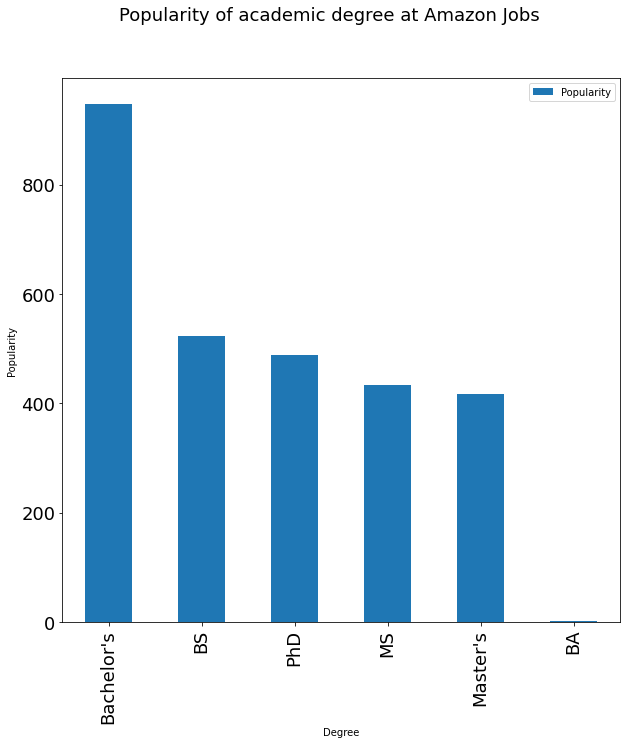

In [52]:
df_degree_needed = df_degree_needed[::-1] 
df_degree_needed.plot.bar(x='Degree',y='Popularity', figsize=(10,10),stacked=True)
plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)
plt.xlabel("Degree")
plt.ylabel("Popularity")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()